In [1]:
import pandas as pd

In [2]:
df_cus = pd.read_csv( '/work/customers.csv' )

In [3]:
df_order = pd.read_csv( '/work/orders.csv' )

# data pre-processing 1 removing repetitive rows  

In [4]:
string_to_remove = 'prior'
df_order = df_order[df_order['eval_set'] != string_to_remove]
df_order

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
49,2196797,5,train,5,0,11,6.0
...,...,...,...,...,...,...,...
3420933,1716008,206205,train,4,1,16,10.0
3421001,1043943,206206,test,68,0,20,0.0
3421018,2821651,206207,test,17,2,13,14.0
3421068,803273,206208,test,50,5,11,4.0


In [5]:
len( df_cus[df_cus['user_id'].isin( df_order['user_id'] )] )

206209

In [6]:
len( df_order[df_order['user_id'].isin( df_cus['user_id'] )] )

206209

# data merge

In [7]:
merged_df = pd.merge(df_cus, df_order, on='user_id')
merged_df

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,3004753,test,9,2,16,22.0
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285,2666573,train,13,6,18,28.0
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568,2945172,test,10,3,9,16.0
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049,945702,train,19,3,10,23.0
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374,3124346,train,24,4,13,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,168073,Lisa,Case,Female,North Carolina,44,4/1/2020,1,married,148828,819846,test,5,2,14,30.0
206205,49635,Jeremy,Robbins,Male,Hawaii,62,4/1/2020,3,married,168639,209547,test,5,6,13,30.0
206206,135902,Doris,Richmond,Female,Missouri,66,4/1/2020,2,married,53374,3041183,test,9,1,13,16.0
206207,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799,1187097,train,4,2,10,30.0


# deal with missing value 

In [8]:

merged_df['date_joined'] = pd.to_datetime(merged_df['date_joined'])
#the dataframe is relative clean as only one columns have missing values 
missing_value_counts = merged_df.isnull().sum()
missing_value_counts

user_id                       0
First Name                11259
Surnam                        0
Gender                        0
STATE                         0
Age                           0
date_joined                   0
n_dependants                  0
fam_status                    0
income                        0
order_id                      0
eval_set                      0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order        0
dtype: int64

In [9]:
#deal with missing values
#since there is a user_id column, I decide to remove name columns to reduce the data size
#also drop unnesessary columns   
merged_df['date_joined'] = pd.to_datetime(merged_df['date_joined'])
columns_to_drop = ['First Name', 'Surnam','eval_set','order_id']
merged_df = merged_df.drop(columns=columns_to_drop)
merged_df

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,9,2,16,22.0
1,33890,Female,New Mexico,36,2017-01-01,0,single,59285,13,6,18,28.0
2,65803,Male,Idaho,35,2017-01-01,2,married,99568,10,3,9,16.0
3,125935,Female,Iowa,40,2017-01-01,0,single,42049,19,3,10,23.0
4,130797,Female,Maryland,26,2017-01-01,1,married,40374,24,4,13,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
206204,168073,Female,North Carolina,44,2020-04-01,1,married,148828,5,2,14,30.0
206205,49635,Male,Hawaii,62,2020-04-01,3,married,168639,5,6,13,30.0
206206,135902,Female,Missouri,66,2020-04-01,2,married,53374,9,1,13,16.0
206207,81095,Female,California,27,2020-04-01,1,married,99799,4,2,10,30.0


# descriptive statistics 

In [10]:
# Summary statistics
print("Summary Statistics:")
print(merged_df.describe())

Summary Statistics:
             user_id            Age   n_dependants         income  \
count  206209.000000  206209.000000  206209.000000  206209.000000   
mean   103105.000000      49.501646       1.499823   94632.852548   
std     59527.555167      18.480962       1.118433   42473.786988   
min         1.000000      18.000000       0.000000   25903.000000   
25%     51553.000000      33.000000       0.000000   59874.000000   
50%    103105.000000      49.000000       1.000000   93547.000000   
75%    154657.000000      66.000000       3.000000  124244.000000   
max    206209.000000      81.000000       3.000000  593901.000000   

        order_number      order_dow  order_hour_of_day  days_since_prior_order  
count  206209.000000  206209.000000      206209.000000           206209.000000  
mean       16.590367       2.773957          13.585304               17.061782  
std        16.654774       2.123616           4.221405               10.672178  
min         4.000000       0.00000

# data removing for irrelevant data points

In [11]:
# Drop rows based on multiple criteria 
criteria = merged_df['income'] > 180000
merged_df = merged_df.loc[~criteria]
merged_df

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,9,2,16,22.0
1,33890,Female,New Mexico,36,2017-01-01,0,single,59285,13,6,18,28.0
2,65803,Male,Idaho,35,2017-01-01,2,married,99568,10,3,9,16.0
3,125935,Female,Iowa,40,2017-01-01,0,single,42049,19,3,10,23.0
4,130797,Female,Maryland,26,2017-01-01,1,married,40374,24,4,13,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
206204,168073,Female,North Carolina,44,2020-04-01,1,married,148828,5,2,14,30.0
206205,49635,Male,Hawaii,62,2020-04-01,3,married,168639,5,6,13,30.0
206206,135902,Female,Missouri,66,2020-04-01,2,married,53374,9,1,13,16.0
206207,81095,Female,California,27,2020-04-01,1,married,99799,4,2,10,30.0


In [12]:
# Drop rows based on multiple criteria and and here i have my cleaned data
criteria = merged_df['order_number'] < 6
merged_df = merged_df.loc[~criteria]
merged_df

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,9,2,16,22.0
1,33890,Female,New Mexico,36,2017-01-01,0,single,59285,13,6,18,28.0
2,65803,Male,Idaho,35,2017-01-01,2,married,99568,10,3,9,16.0
3,125935,Female,Iowa,40,2017-01-01,0,single,42049,19,3,10,23.0
4,130797,Female,Maryland,26,2017-01-01,1,married,40374,24,4,13,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
206199,179673,Male,Wyoming,77,2020-04-01,0,divorced/widowed,162239,7,1,17,2.0
206201,75529,Female,West Virginia,25,2020-04-01,2,married,56513,9,3,19,30.0
206202,157533,Male,Utah,53,2020-04-01,0,single,35973,7,0,13,30.0
206203,122741,Male,Michigan,24,2020-04-01,2,married,73357,11,3,21,22.0


# Univariate Analysis:

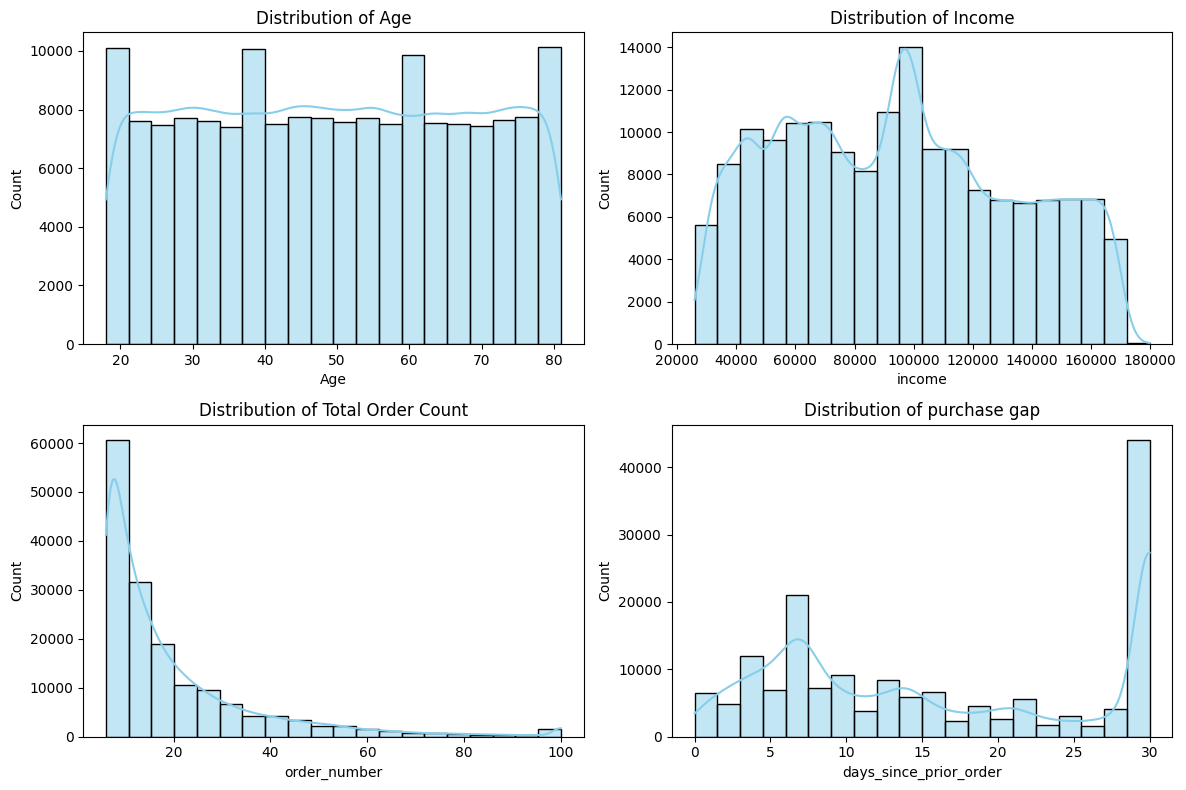

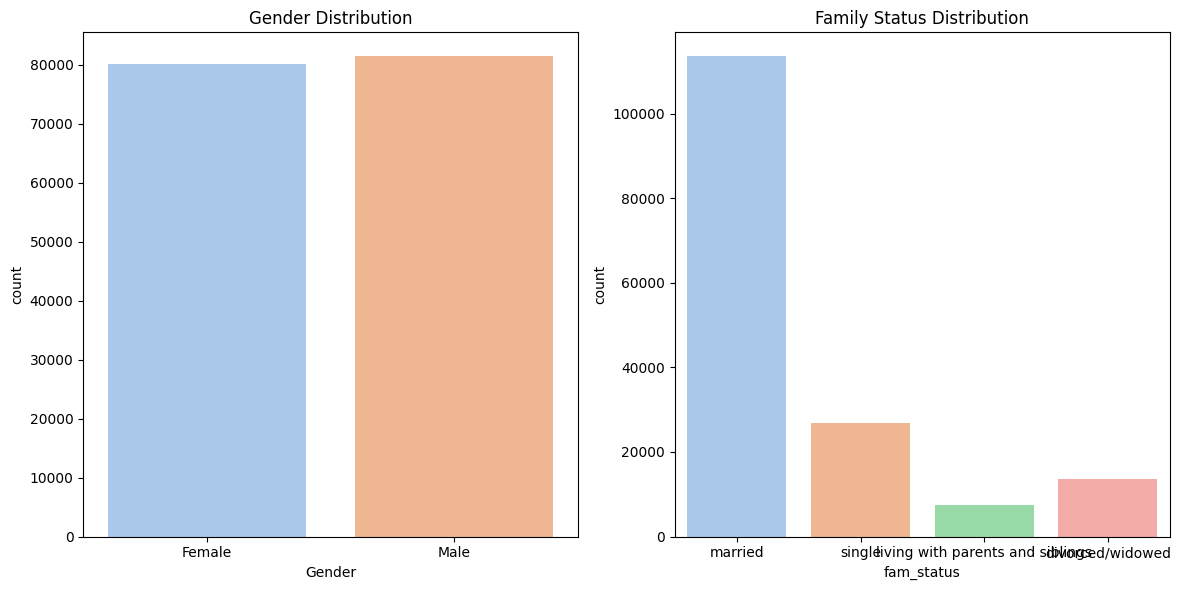

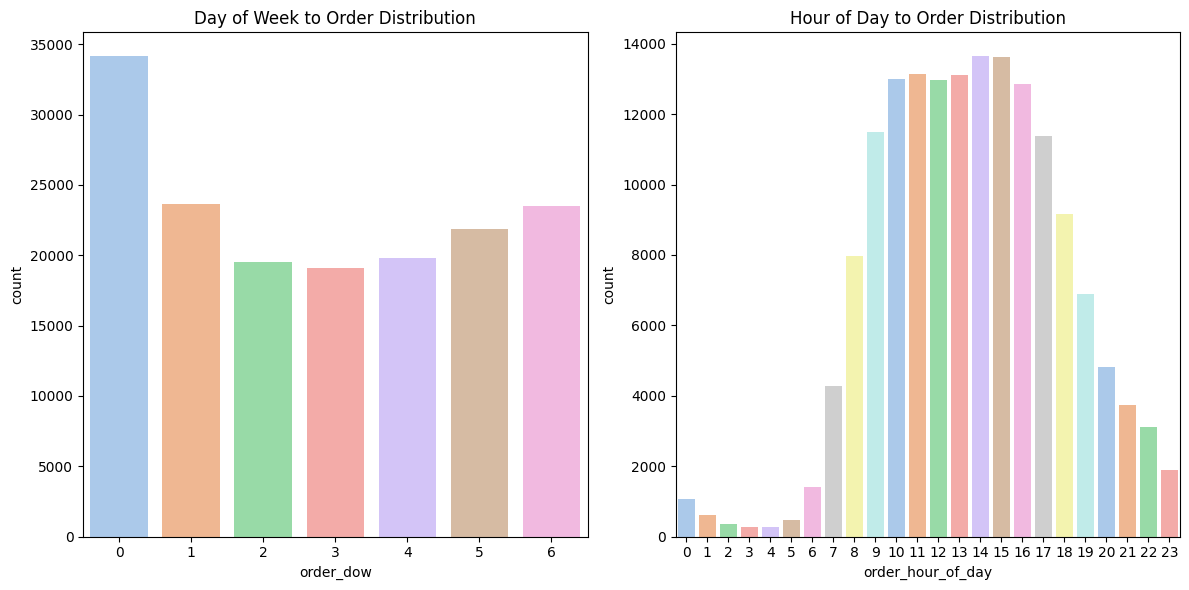

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizing the distribution of numerical variables
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(merged_df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(merged_df['income'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Income')

plt.subplot(2, 2, 3)
sns.histplot(merged_df['order_number'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Order Count')

plt.subplot(2, 2, 4)
sns.histplot(merged_df['days_since_prior_order'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of purchase gap')

plt.tight_layout()
plt.show()

# Visualizing categorical variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=merged_df, palette='pastel')
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='fam_status', data=merged_df, palette='pastel')
plt.title('Family Status Distribution')

plt.tight_layout()
plt.show()

# Visualizing other variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='order_dow', data=merged_df, palette='pastel')
plt.title('Day of Week to Order Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='order_hour_of_day', data=merged_df, palette='pastel')
plt.title('Hour of Day to Order Distribution')

plt.tight_layout()
plt.show()


# performing Feature Engineering to find  out the busiest days of the week and hours of the day

In [14]:

# Add a new column for time period
def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

merged_df['time_period'] = merged_df['order_hour_of_day'].apply(categorize_time)

day_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
merged_df['day_of_week'] = merged_df['order_dow'].map(day_mapping)
merged_df



/tmp/ipykernel_178/3369757543.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['time_period'] = merged_df['order_hour_of_day'].apply(categorize_time)
/tmp/ipykernel_178/3369757543.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['day_of_week'] = merged_df['order_dow'].map(day_mapping)


,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,order_number,order_dow,order_hour_of_day,days_since_prior_order,time_period,day_of_week
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,9,2,16,22.0,Afternoon,Tuesday
1,33890,Female,New Mexico,36,2017-01-01,0,single,59285,13,6,18,28.0,Evening,Saturday
2,65803,Male,Idaho,35,2017-01-01,2,married,99568,10,3,9,16.0,Morning,Wednesday
3,125935,Female,Iowa,40,2017-01-01,0,single,42049,19,3,10,23.0,Morning,Wednesday
4,130797,Female,Maryland,26,2017-01-01,1,married,40374,24,4,13,14.0,Afternoon,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206199,179673,Male,Wyoming,77,2020-04-01,0,divorced/widowed,162239,7,1,17,2.0,Afternoon,Monday
206201,75529,Female,West Virginia,25,2020-04-01,2,married,56513,9,3,19,30.0,Evening,Wednesday
206202,157533,Male,Utah,53,2020-04-01,0,single,35973,7,0,13,30.0,Afternoon,Sunday
206203,122741,Male,Michigan,24,2020-04-01,2,married,73357,11,3,21,22.0,Evening,Wednesday


In [15]:

# Aggregate the data by weekday and time_of_day
aggregated_data = merged_df.groupby(['day_of_week', 'time_period']).agg({
    'user_id': 'count'
}).reset_index()

# Rename columns for clarity
aggregated_data.rename(columns={'user_id': 'usercount'}, inplace=True)

aggregated_data.head()

,day_of_week,time_period,usercount
0,Friday,Afternoon,10333
1,Friday,Evening,3922
2,Friday,Morning,7115
3,Friday,Night,482
4,Monday,Afternoon,11272


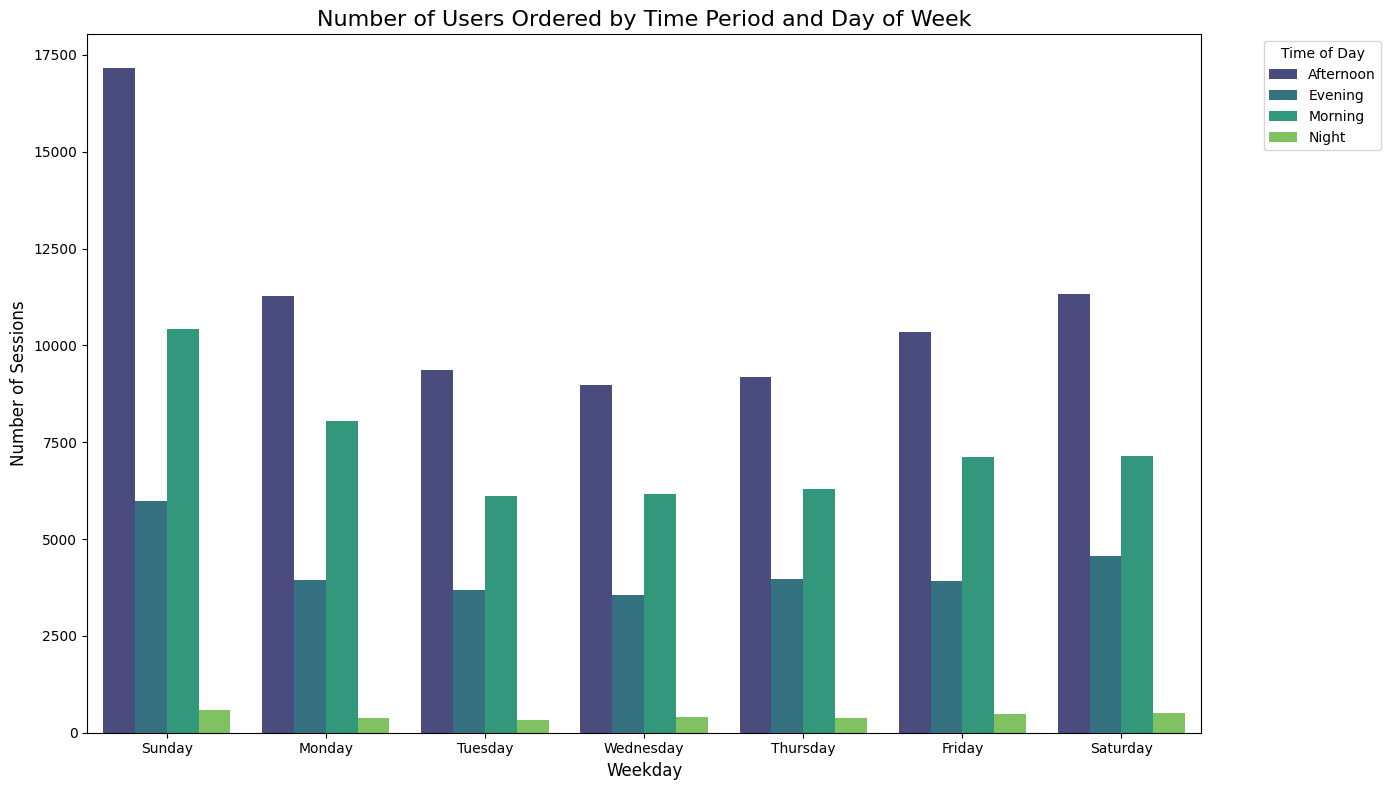

In [16]:
# Adjusting the order of days for the bar plot
day_order = ["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
aggregated_data['day_of_week'] = pd.Categorical(aggregated_data['day_of_week'], categories=day_order, ordered=True)

# Recreating the bar plot with the correct order of days
plt.figure(figsize=(14, 8))
sns.barplot(x='day_of_week', y='usercount', hue='time_period', data=aggregated_data, palette='viridis')
plt.title('Number of Users Ordered by Time Period and Day of Week', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Number of Sessions', fontsize=12)
plt.legend(title='Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# creating binary variable for logistic regression model 

In [17]:
import numpy as np
# Define conditions for high-value and low-value users
more_value =  merged_df['order_number'] > 12
less_value = ~more_value
merged_df['user_status'] = np.where(more_value, 'more_value', 'Lless_value')
merged_df['user_status_numeric'] = merged_df['user_status'].apply(lambda x: 1 if x == 'more_value' else 0)
merged_df

/tmp/ipykernel_178/926176949.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['user_status'] = np.where(more_value, 'more_value', 'Lless_value')
/tmp/ipykernel_178/926176949.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['user_status_numeric'] = merged_df['user_status'].apply(lambda x: 1 if x == 'more_value' else 0)


,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,order_number,order_dow,order_hour_of_day,days_since_prior_order,time_period,day_of_week,user_status,user_status_numeric
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,9,2,16,22.0,Afternoon,Tuesday,Lless_value,0
1,33890,Female,New Mexico,36,2017-01-01,0,single,59285,13,6,18,28.0,Evening,Saturday,more_value,1
2,65803,Male,Idaho,35,2017-01-01,2,married,99568,10,3,9,16.0,Morning,Wednesday,Lless_value,0
3,125935,Female,Iowa,40,2017-01-01,0,single,42049,19,3,10,23.0,Morning,Wednesday,more_value,1
4,130797,Female,Maryland,26,2017-01-01,1,married,40374,24,4,13,14.0,Afternoon,Thursday,more_value,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206199,179673,Male,Wyoming,77,2020-04-01,0,divorced/widowed,162239,7,1,17,2.0,Afternoon,Monday,Lless_value,0
206201,75529,Female,West Virginia,25,2020-04-01,2,married,56513,9,3,19,30.0,Evening,Wednesday,Lless_value,0
206202,157533,Male,Utah,53,2020-04-01,0,single,35973,7,0,13,30.0,Afternoon,Sunday,Lless_value,0
206203,122741,Male,Michigan,24,2020-04-01,2,married,73357,11,3,21,22.0,Evening,Wednesday,Lless_value,0


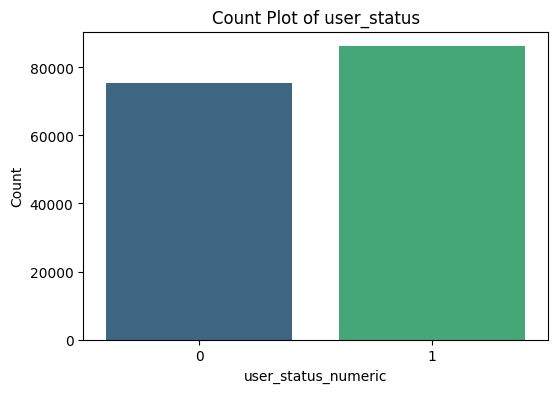

In [18]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='user_status_numeric', data=merged_df, palette='viridis')
plt.title('Count Plot of user_status')
plt.xlabel('user_status_numeric')
plt.ylabel('Count')

# Show the plot
plt.show()

In [19]:
replacement_dict = {'living with parents and siblings': 'single', 'divorced/widowed': 'single'}
merged_df['fam_status'] = merged_df['fam_status'].replace(replacement_dict)
distinct_values = merged_df['fam_status'].unique()
print(distinct_values) 

['married' 'single']
/tmp/ipykernel_178/3973827588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['fam_status'] = merged_df['fam_status'].replace(replacement_dict)


# fit a logistic regression model 

In [20]:
!pip install statsmodels==0.14.1


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import statsmodels.api as sm

In [22]:
X = merged_df[['Gender','Age','fam_status','income','n_dependants','days_since_prior_order']]
y = merged_df['user_status_numeric']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['fam_status','Gender'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [23]:
#X_train = sm.add_constant(X_train)  # add a constant term for the intercept
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Display the summary
result.summary()

Optimization terminated successfully.
         Current function value: 0.648674
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     user_status_numeric   No. Observations:               129264
Model:                           Logit   Df Residuals:                   129258
Method:                            MLE   Df Model:                            5
Date:                 Tue, 19 Dec 2023   Pseudo R-squ.:                 0.06115
Time:                         21:05:13   Log-Likelihood:                -83850.
converged:                        True   LL-Null:                       -89312.
Covariance Type:             nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Age                        0.0047      0.000     14.998      0.000       0.004       0.005
income                  3.395e-06   1.58e-07     21.434      0.000    3.08e-06    3.71e-06
n_dependants               0.1691      0.006     29.196      0.000       0.158       0.180
days_since_prior_order    -0.0540      0.001    -99.963      0.000      -0.055      -0.053
fam_status_single          0.3963      0.015     27.103      0.000       0.368       0.425
Gender_Male                0.0806      0.011      7.087      0.000       0.058       0.103
==========================================================================================
"""

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# model validation 

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif_data)


                 Variable        VIF
0                   const  23.615028
1                     Age   1.287260
2                  income   1.230264
3            n_dependants   1.953196
4  days_since_prior_order   1.000841
5       fam_status_single   2.012192
6             Gender_Male   1.000021


Accuracy: 0.6368

Confusion Matrix:
[[ 8846  6220]
 [ 5516 11735]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.59      0.60     15066
           1       0.65      0.68      0.67     17251

    accuracy                           0.64     32317
   macro avg       0.63      0.63      0.63     32317
weighted avg       0.64      0.64      0.64     32317


ROC AUC Score: 0.6614


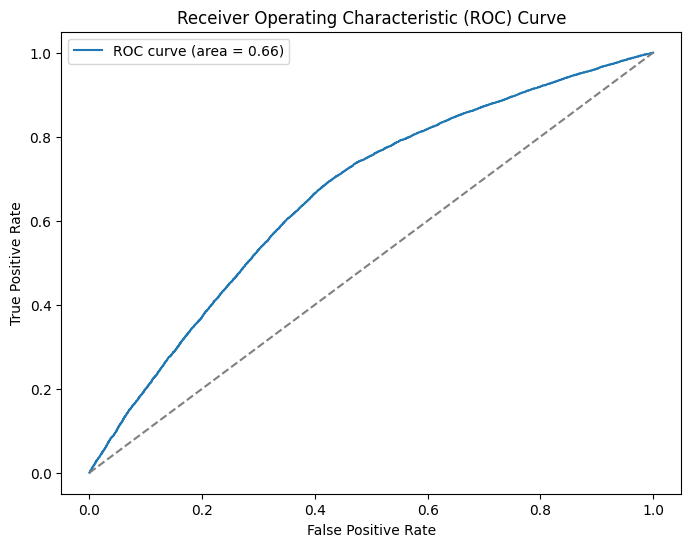

In [27]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)
print(f"\nROC AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ddf91448-8a62-4101-9b7b-bcbccdcac313' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>